# Chapter 9 - Problem 5

We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary.We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

**A.** Generate a data set with n = 500 and p = 2, such that the observations
belong to two classes with a quadratic decision boundary
between them.

In [102]:
x1 <- runif(500) - 0.5
x2 <- runif(500) - 0.5
eps <- rnorm(500, sd = 0.05)
y <- (2*x1^2 - 3*x2^2 + x1) + eps > 0


**B.** Plot the observations, colored according to their class labels.
Your plot should display $x_1$ on the x-axis, and $x_2$ on the y-axis.

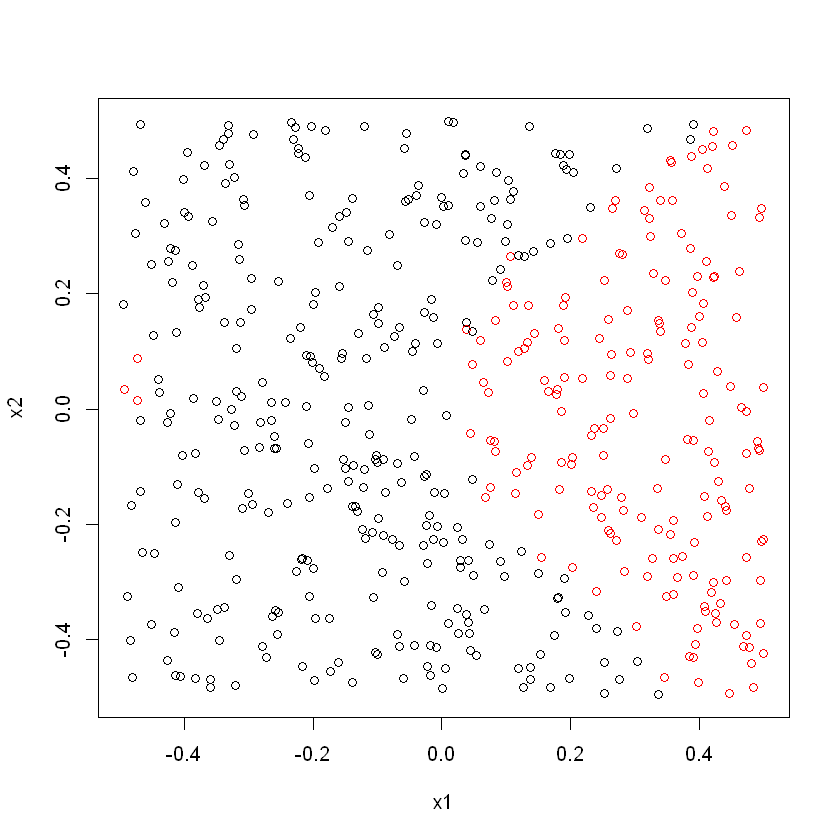

In [103]:
plot(x1,x2, col = y+1, xlab = "x1", ylab = "x2")

**C.** Fit a logistic regression model to the data, using $x_1$ and $x_2$ as
predictors.

In [104]:
train <- sample(1:500,400)
dat <- data.frame(x1,x2,y = as.factor(y))
train.dat <- dat[train,]
test.dat <- dat[-train,]

log.reg <- glm(y~., data = train.dat, family = "binomial")
summary(log.reg)


Call:
glm(formula = y ~ ., family = "binomial", data = train.dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7064  -0.2565  -0.0493   0.2420   4.2023  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.2204     0.2956  -7.512 5.83e-14 ***
x1           14.1298     1.5120   9.345  < 2e-16 ***
x2            0.6710     0.6615   1.014     0.31    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 522.73  on 399  degrees of freedom
Residual deviance: 187.95  on 397  degrees of freedom
AIC: 193.95

Number of Fisher Scoring iterations: 7


**D.** Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations,
colored according to the predicted class labels. The
decision boundary should be linear.

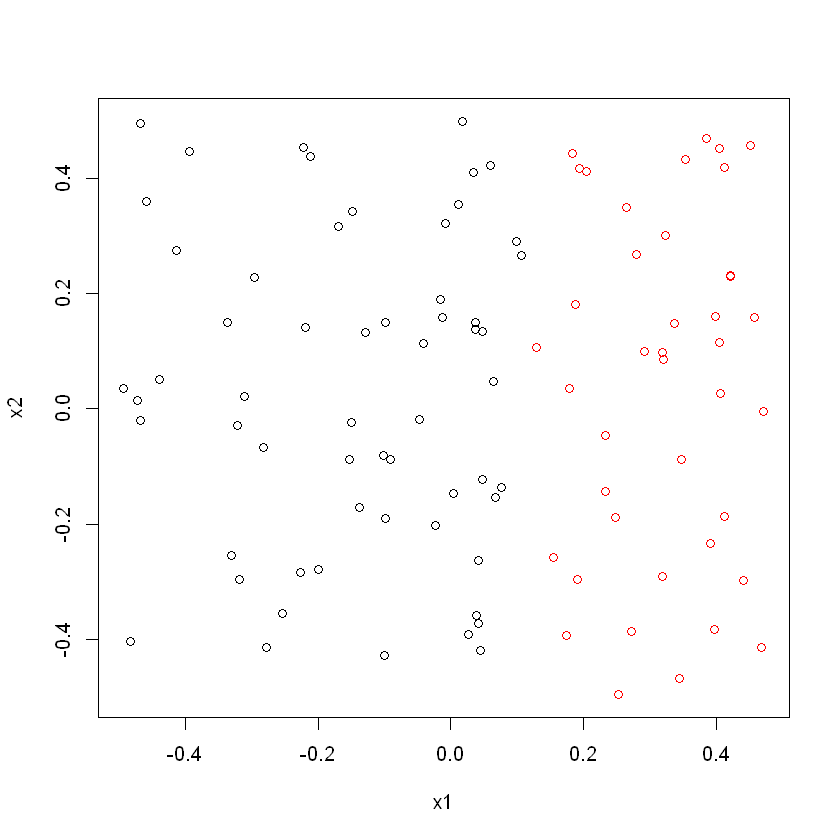

In [105]:
log.prob <- predict(log.reg, newdata = test.dat, type = "response")
log.pred <- ifelse(log.prob > 0.4, TRUE,FALSE)
plot(test.dat[,1:2], col = log.pred+1, xlab = "x1", ylab = "x2")

In [106]:
table(log.pred, test.dat[,3])

        
log.pred FALSE TRUE
   FALSE    52    7
   TRUE      8   33

Train misclassification error for the logistic regression model is 15% 

**E.** Now fit a logistic regression model to the data using non-linear
functions of $x_1$ and $x_2$ as predictors (e.g. $x_1^2$, $x_1$×$x_2$, log($x_2$) and so forth).

In [108]:
log.reg.2 <- glm(y ~ x1 + x2 + I(x1^2) + I(x2^2) , data = train.dat, family = "binomial")
summary(log.reg.2)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = y ~ x1 + x2 + I(x1^2) + I(x2^2), family = "binomial", 
    data = train.dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.62868  -0.00042   0.00000   0.00000   2.04708  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)    0.2293     1.1718   0.196  0.84485   
x1            91.3368    29.3348   3.114  0.00185 **
x2             2.9834     3.8618   0.773  0.43979   
I(x1^2)      202.1774    67.0623   3.015  0.00257 **
I(x2^2)     -288.9177    94.7171  -3.050  0.00229 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 522.735  on 399  degrees of freedom
Residual deviance:  16.068  on 395  degrees of freedom
AIC: 26.068

Number of Fisher Scoring iterations: 12


**F.** Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations,
colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)-(e) until you come up with an example in which
the predicted class labels are obviously non-linear.

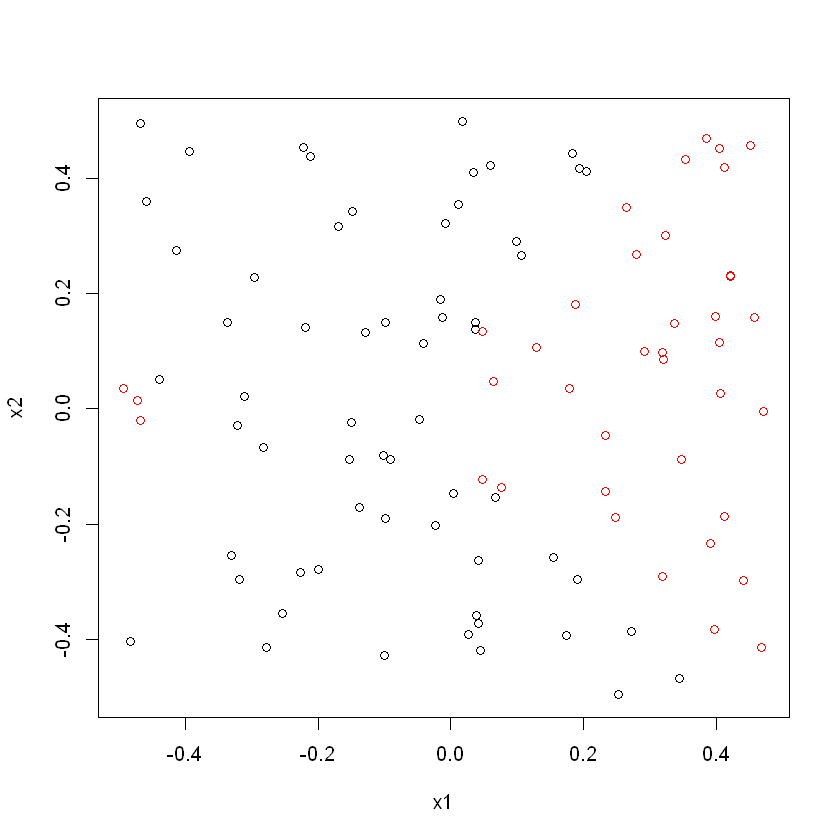

In [109]:
log.prob.2 <- predict(log.reg.2, newdata = test.dat[,1:2], type = "response")
log.pred.2 <- ifelse(log.prob.2 > 0.5, TRUE,FALSE)
plot(test.dat[,1:2], col = log.pred.2+1, xlab = "x1", ylab = "x2")

In [110]:
table(log.pred.2, test.dat[,3])

          
log.pred.2 FALSE TRUE
     FALSE    56    5
     TRUE      4   35

In [ ]:
The misclassification error for the logistic regression is 9%

**G.** Fit a support vector classifier to the data with $x_1$ and $x_2$ as
predictors. Obtain a class prediction for each training observation.
Plot the observations, colored according to the predicted
class labels.

In [119]:
library(e1071) 
svm.linear <- svm(y ~ .,data = dat, kernel = "linear", cost = 5) 
print(svm.linear)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  5 
      gamma:  0.5 

Number of Support Vectors:  142



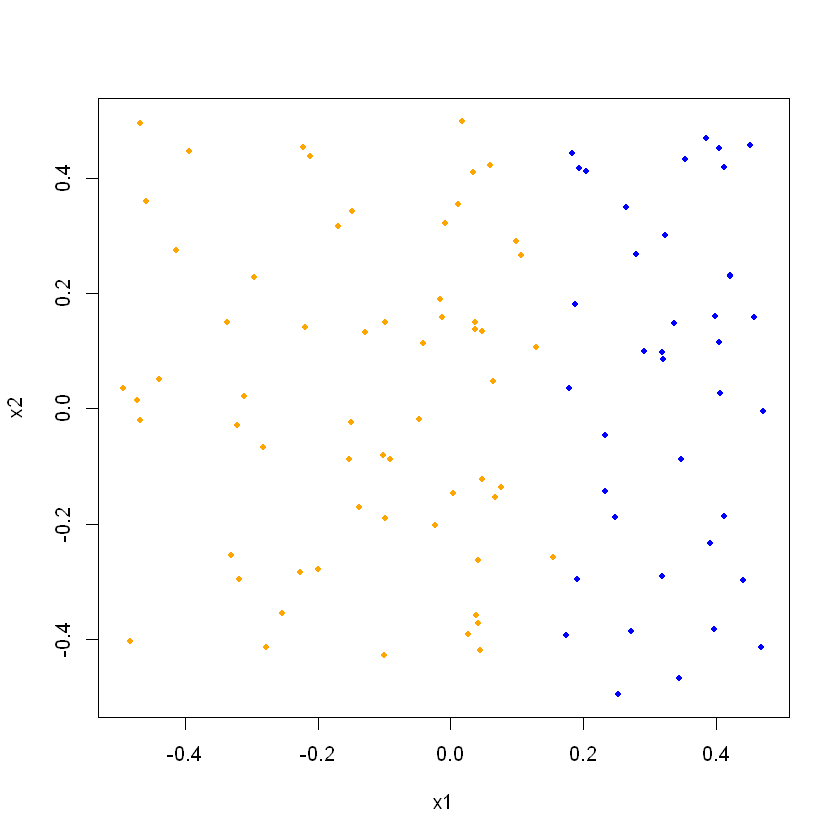

In [120]:
y.svm.linear <- predict(svm.linear,test.dat[,1:2])
plot(test.dat[1:2], col = c("orange","blue")[as.numeric(y.svm.linear)],pch = 20)

In [126]:
table(y.svm.linear, test.dat[,3])

            
y.svm.linear FALSE TRUE
       FALSE    52    9
       TRUE      8   31

The test misclassification error for the support vector classifier is 17%.

**H.** Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.

In [134]:
svm.radial <- svm(y ~ .,data = dat, kernel = "radial", cost = 1) 
print(svm.radial)


Call:
svm(formula = y ~ ., data = dat, kernel = "radial", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  95



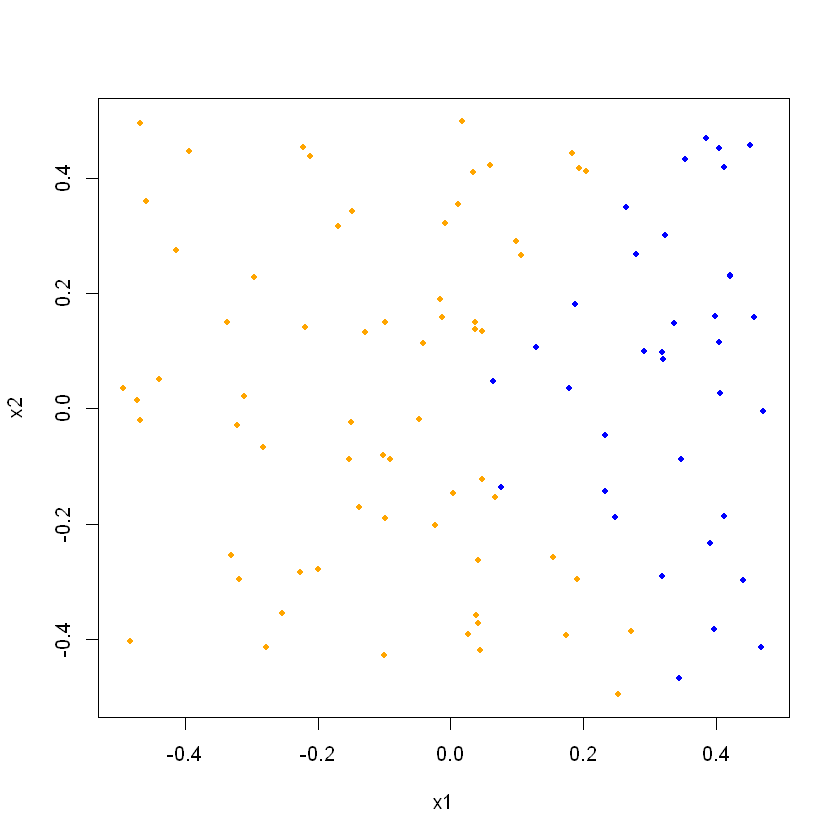

In [135]:
y.svm.radial <- predict(svm.radial, test.dat[,1:2])
plot(test.dat[1:2], col = c("orange","blue")[as.numeric(y.svm.radial)],pch = 20)

In [136]:
table(y.svm.radial, test.dat[,3])

            
y.svm.radial FALSE TRUE
       FALSE    59    6
       TRUE      1   34

The test misclassification error for the support vector machine with a gaussian kernel is 7%.

**I.** Comment on your results.

1. Both the logistic regression and support vector classifier showed significant improvements when considering the non-linearity of the problem.  
2. Even though the classification error for the support vector machine was lower than the logistic regression with non-linear terms. I would choose the latter since it is a model much simpler to interpret.